# Quick start

The example data to replicate the figure in the jupyter notebook can be found [here](https://www.dropbox.com/s/1kc0ulz7yudd9ru/A2929-200711.tar.gz?dl=1). 

The data contain a short sample of a simultaneous recording during sleep and wake from the anterodorsal nucleus of the thalamus and the hippocampus. It contains both head-direction cells (i.e. cells that fire for a particular direction in the horizontal plane) and place cells (i.e. cells that fire for a particular position in the environment).

Preprocessing of the data was made with [Kilosort 2.0](https://github.com/MouseLand/Kilosort) and spike sorting was made with [Klusters](http://neurosuite.sourceforge.net/).

Instructions for installing pynapple can be found [here](https://peyrachelab.github.io/pynapple/#installation).

***

This notebook is meant to provide an overview of pynapple by going through:
1. **Input output (IO)**. In this case, pynapple will load a session containing data processed with NeuroSuite and automatically create a [NWB file](https://pynwb.readthedocs.io/en/stable/). See this [notebook](https://peyrachelab.github.io/pynapple/notebooks/pynapple-io-notebook/) for more informations about the IO and how to make a custom IO.
2. **Core functions** that handle time series, interval sets and group of time series. See this [notebook](https://peyrachelab.github.io/pynapple/notebooks/pynapple-core-notebook/) for a detailled usage of the core functions.
3. **Process functions**. A small collection of high-level functions widely used in system neuroscience. This [notebook](https://peyrachelab.github.io/pynapple/notebooks/pynapple-process-notebook/) details those functions. Examples of higher level of analysis can be found in the collaborative repository [pynacollada](https://github.com/PeyracheLab/pynacollada).



In [1]:
import numpy as np
import pandas as pd
import pynapple as nap

The first step is to give the path to the data folder.

In [2]:
data_directory = '/home/guillaume/pynapple/data/A2929-200711'

We can load the session with the function *load_session*. When loading a session for the first time, pynapple will show a GUI in order for the user to provide the information about the session, the subject, the tracking, the epochs and the neuronal data. When informations has been entered, a [NWB file](https://pynwb.readthedocs.io/en/stable/) is created. In this example dataset, the NWB file already exists.

In [3]:
data = nap.load_session(data_directory, 'neurosuite')

The object *data* contains the information about the session such as the spike times of all the neurons, the tracking data and the start and ends of the epochs. We can check each object.

In [4]:
spikes = data.spikes
spikes

  Index    Freq. (Hz)    group  location
-------  ------------  -------  ----------
      0          7.3         0  adn
      1          5.73        0  adn
      2          8.12        0  adn
      3          6.68        0  adn
      4         10.77        0  adn
      5         11           0  adn
      6         16.52        0  adn
      7          2.2         1  ca1
      8          2.02        1  ca1
      9          1.07        1  ca1
     10          3.92        1  ca1
     11          3.31        1  ca1
     12          1.09        1  ca1
     13          1.28        1  ca1
     14          1.32        1  ca1

*spikes* is a [TsGroup](https://peyrachelab.github.io/pynapple/core.ts_group/) object. It allows to group together time series with different timestamps and associate metainformation about each neuron. Under the hood, it wraps a dictionnary. In this case, the location of where the neuron was recorded has been added when loading the session for the first time.

In this case it holds 15 neurons and it is possible to access, similar to a dictionnary, the spike times of a single neuron: 

In [5]:
neuron_0 = spikes[0]
neuron_0

Time (s)
0.00845      NaN
0.03265      NaN
0.13230      NaN
0.30340      NaN
0.32900      NaN
              ..
1186.12755   NaN
1189.38400   NaN
1194.13475   NaN
1196.20750   NaN
1196.67675   NaN
Length: 8764, dtype: float64

*neuron_0* is a [Ts](https://peyrachelab.github.io/pynapple/core.time_series/#pynapple.core.time_series.Ts) object containing the times of the spikes. Under the hood, it's wrapping a pandas series.

The other information about the session is contained in *data.epochs*. In this case, the start and end of the sleep and wake epochs.

In [6]:
epochs = data.epochs
epochs

{'sleep':    start    end
 0    0.0  600.0,
 'wake':    start     end
 0  600.0  1200.0}

Finally this dataset contains tracking of the animal in the environment. It can be accessed through *data.position*. *rx, ry, rz* represent respectively the roll, the yaw and the pitch of the head of the animal. *x* and *z* represent the position of the animal in the horizontal plane while *y* represent the elevation.

In [7]:
position = data.position
print(position)

                  rx        ry        rz         x         y         z
Time (s)                                                              
670.64070   0.343163  5.207148  5.933598 -0.042857  0.425023 -0.195725
670.64900   0.346745  5.181029  5.917368 -0.043863  0.424850 -0.195110
670.65735   0.344035  5.155508  5.905679 -0.044853  0.424697 -0.194674
670.66565   0.322240  5.136537  5.892457 -0.045787  0.424574 -0.194342
670.67400   0.315836  5.120850  5.891577 -0.046756  0.424563 -0.194059
...              ...       ...       ...       ...       ...       ...
1199.96160  6.009812  3.665954  0.230562  0.011241  0.037891 -0.001479
1199.96995  6.014660  3.634619  0.260742  0.010974  0.038677 -0.002370
1199.97825  6.031694  3.617849  0.276835  0.010786  0.039410 -0.003156
1199.98660  6.040435  3.609446  0.287006  0.010661  0.040064 -0.003821
1199.99495  6.050059  3.609375  0.293275  0.010624  0.040568 -0.004435

[63527 rows x 6 columns]


***

The core functions of pynapple provides many ways to manipulate time series. In this example, spike times are restricted to the wake epoch. Notice how the frequencies are changing.

In [8]:
spikes_wake = spikes.restrict(epochs['wake'])

print(spikes_wake)

  Index    Freq. (Hz)    group  location
-------  ------------  -------  ----------
      0          4.85        0  adn
      1          8.06        0  adn
      2          7.11        0  adn
      3          7.66        0  adn
      4          7.97        0  adn
      5         11.29        0  adn
      6         22.08        0  adn
      7          1.82        1  ca1
      8          2.84        1  ca1
      9          0.7         1  ca1
     10          4.78        1  ca1
     11          4.93        1  ca1
     12          1.71        1  ca1
     13          0.97        1  ca1
     14          0.26        1  ca1


The same operation can be applied to position. But in this example, we want all the epochs for which position in *x* is above a certain threhsold. We can used the function *threshold*.

Text(0, 0.5, 'x')

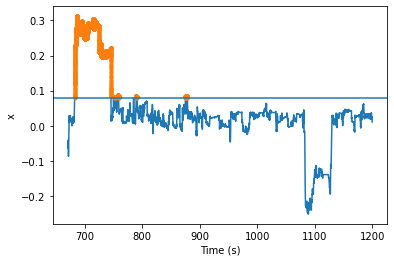

In [9]:
import matplotlib.pyplot as plt

posx = position['x']

threshold = 0.08

posxpositive = posx.threshold(threshold)

plt.plot(posx.as_units('s'))
plt.plot(posxpositive.as_units('s'), '.')
plt.axhline(threshold)
plt.xlabel("Time (s)")
plt.ylabel("x")

The epochs above the threshold can be accessed through the time support of the Tsd object. The time support is an important concept in the pynapple package. It helps the user to define the epochs for which the time serie should be defined. By default, Ts, Tsd and TsGroup objects possess a time support (defined as an IntervalSet). It is recommended to pass the time support when instantiating one of those objects.

In [10]:
epochs_above_thr = posxpositive.time_support
print(epochs_above_thr)

        start         end
0  682.660850  745.565725
1  752.240350  752.440325
2  752.582000  752.673649
3  757.498375  758.998300
4  789.863275  790.271575
5  875.225250  876.066875
6  878.158425  878.641724


***
# Tuning curves

Let's do more advanced analysis. Neurons from ADn (group 0 in the *spikes* group object) are know for firing for a particular direction. Therefore, we can compute their tuning curves, i.e. their firing rates as a function of the head-direction of the animal in the horizontal plane (*ry*). We can use the function *compute_1d_tuning_curves*. In this case, the tuning curves are computed over 120 bins and between 0 and 2$\pi$.

In [11]:
tuning_curves = nap.compute_1d_tuning_curves(group=spikes, 
                                             feature=position['ry'],                                              
                                             nb_bins=121, 
                                             minmax=(0, 2*np.pi))

tuning_curves

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0.026180,45.520459,0.0,0.000000,6.207335,6.207335,6.207335,0.0,6.207335,12.414671,2.069112,6.207335,10.345559,14.483782,0.000000,2.069112
0.078540,56.731282,0.0,0.000000,5.454931,3.272959,3.272959,0.0,10.909862,10.909862,2.181972,8.727890,16.364793,1.090986,0.000000,0.000000
0.130900,73.851374,0.0,0.000000,16.924273,4.615711,1.538570,0.0,12.308562,4.615711,1.538570,3.077141,12.308562,10.769992,1.538570,0.000000
0.183260,82.111067,0.0,0.000000,7.579483,1.263247,2.526494,0.0,20.211955,8.842730,0.000000,6.316236,18.948708,8.842730,2.526494,0.000000
0.235619,74.353081,0.0,0.000000,11.739960,5.217760,2.608880,0.0,5.217760,3.913320,1.304440,16.957720,30.002121,7.826640,2.608880,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.047566,14.832509,0.0,0.000000,12.135689,1.348410,14.832509,0.0,0.000000,1.348410,0.000000,9.438869,2.696820,0.000000,0.000000,1.348410
6.099926,22.327159,0.0,0.000000,13.954475,0.000000,11.163580,0.0,5.581790,2.790895,0.000000,2.790895,8.372685,2.790895,0.000000,0.000000
6.152286,42.355935,0.0,0.000000,21.177967,0.000000,7.059322,0.0,4.706215,4.706215,2.353107,7.059322,14.118645,0.000000,2.353107,0.000000
6.204645,60.004241,0.0,2.000141,8.000565,2.000141,10.000707,0.0,8.000565,4.000283,0.000000,14.000990,22.001555,6.000424,0.000000,0.000000


We can plot tuning curves in polar plots.

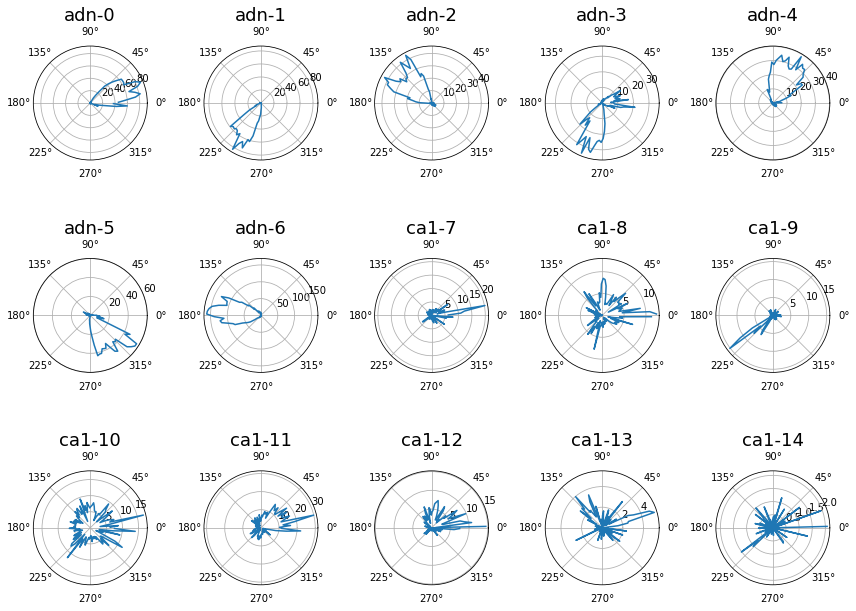

In [12]:
neuron_location = spikes.get_info('location') # to know where the neuron was recorded
plt.figure(figsize=(12,9))

for i,n in enumerate(tuning_curves.columns):
    plt.subplot(3,5,i+1, projection = 'polar')
    plt.plot(tuning_curves[n])
    plt.title(neuron_location[n] + '-' + str(n), fontsize = 18)
    
plt.tight_layout()
plt.show()


While ADN neurons show obvious modulation for head-direction, it is not obvious for all CA1 cells. Therefore we want to restrict the remaining of the analysis to only ADN neurons. We can split the *spikes* group with the function *getby_category*.

In [13]:
spikes_by_location = spikes.getby_category('location')

print(spikes_by_location['adn'])
print(spikes_by_location['ca1'])

spikes_adn = spikes_by_location['adn']

  Index    Freq. (Hz)    group  location
-------  ------------  -------  ----------
      0          7.3         0  adn
      1          5.73        0  adn
      2          8.12        0  adn
      3          6.68        0  adn
      4         10.77        0  adn
      5         11           0  adn
      6         16.52        0  adn
  Index    Freq. (Hz)    group  location
-------  ------------  -------  ----------
      7          2.2         1  ca1
      8          2.02        1  ca1
      9          1.07        1  ca1
     10          3.92        1  ca1
     11          3.31        1  ca1
     12          1.09        1  ca1
     13          1.28        1  ca1
     14          1.32        1  ca1


# Correlograms

A classical question with head-direction cells is how pairs stay coordinated across brain states i.e. wake vs sleep (see Peyrache, A., Lacroix, M. M., Petersen, P. C., & Buzsáki, G. (2015). Internally organized mechanisms of the head direction sense. Nature neuroscience, 18(4), 569-575.)

In this example, this coordination across brain states will be evaluated with cross-correlograms of pairs of neurons. We can call the function *compute_crosscorrelogram* on both sleep and wake epochs.

In [14]:
cc_wake = nap.compute_crosscorrelogram(group=spikes_adn,                                        
                                       binsize=20, # ms
                                       windowsize=4000, # ms
                                       ep=epochs['wake'], 
                                       norm=True,
                                       time_units='ms')
                                      
cc_sleep = nap.compute_crosscorrelogram(group=spikes_adn,                                       
                                       binsize=5, # ms
                                       windowsize=400, # ms
                                        ep=epochs['sleep'], 
                                       norm=True,
                                       time_units='ms')

From the previous figure, we can see that neurons 0 and 1 fires for opposite direction during wake. Therefore we expect their cross-correlograms to show a through around 0 time lag meaning those two neurons do not fire spikes together. A similar through during sleep for the same pair will thus indicates a persistence of their coordination even if the animal is not moving its head.

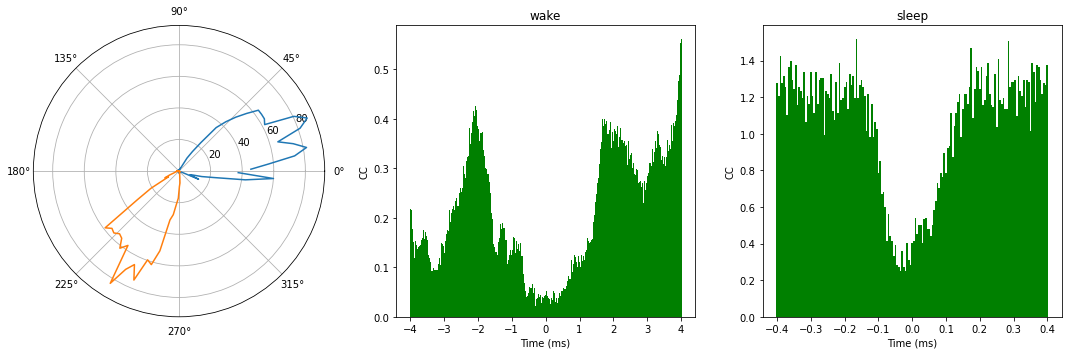

In [15]:
xtwake = cc_wake.index.values
xtsleep = cc_sleep.index.values

plt.figure(figsize = (15, 5))
plt.subplot(131, projection = 'polar')
plt.plot(tuning_curves[[0,1]]) # The tuning curves of the pair [0,1]
plt.subplot(132)
# plt.plot(cc_wake[(0,1)], color = 'red') # The wake cross-corr of pair (0,1)
plt.bar(xtwake, cc_wake[(0,1)].values, 0.02, color = 'green') # The wake cross-corr of pair (0,1)
plt.title('wake')
plt.xlabel("Time (ms)")
plt.ylabel("CC")
plt.subplot(133)
# plt.plot(cc_sleep[(0,1)], color = 'red')
plt.bar(xtsleep, cc_sleep[(0,1)].values, 0.005, color = 'green') # The wake cross-corr of pair (0,1)
plt.title('sleep')
plt.xlabel("Time (ms)")
plt.ylabel("CC")
plt.tight_layout()
plt.show()

# Decoding

This last analysis shows how to use the function decoding of pynapple, in this case with head-direction cells.

The previous result indicates a persistent coordination of head-direction cells during sleep. Therefore it is possible to decode a virtual head-direction signal even if the animal is not moving its head. 
This example uses the function *decode_1d* which implements bayesian decoding (see : Zhang, K., Ginzburg, I., McNaughton, B. L., & Sejnowski, T. J. (1998). Interpreting neuronal population activity by reconstruction: unified framework with application to hippocampal place cells. Journal of neurophysiology, 79(2), 1017-1044.)

First we can validate the decoding function with the real position of the head of the animal during wake.

In [16]:
tuning_curves_adn = nap.compute_1d_tuning_curves(spikes_adn,
                                                 position['ry'],
                                                 nb_bins=121,
                                                 minmax=(0, 2*np.pi))

decoded, proba_angle = nap.decode_1d(tuning_curves=tuning_curves_adn, 
                                     group=spikes_adn, 
                                     ep=epochs['wake'],                                 
                                     bin_size=0.3, # second
                                     feature=position['ry'], 
                                    )
print(decoded)

Time (s)
600.15     2.225295
600.45     2.068215
600.75     2.277655
601.05     1.963495
601.35     2.172935
             ...   
1198.65    4.581489
1198.95    4.214970
1199.25    4.581489
1199.55    4.633849
1199.85    4.110250
Length: 2000, dtype: float64


We can plot the decoded head-direction along with the true head-direction.

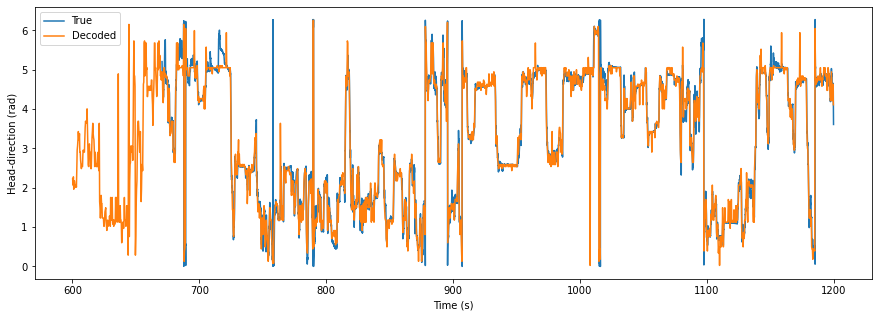

In [17]:
plt.figure(figsize=(15,5))
plt.plot(position['ry'].as_units('s'), label = 'True')
plt.plot(decoded.as_units('s'), label = 'Decoded')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Head-direction (rad)")
plt.show()

Finally we can plot the decoded activity during sleep and overlay spiking activity of ADN neurons as a raster plot (in this case only during the first 10 seconds).

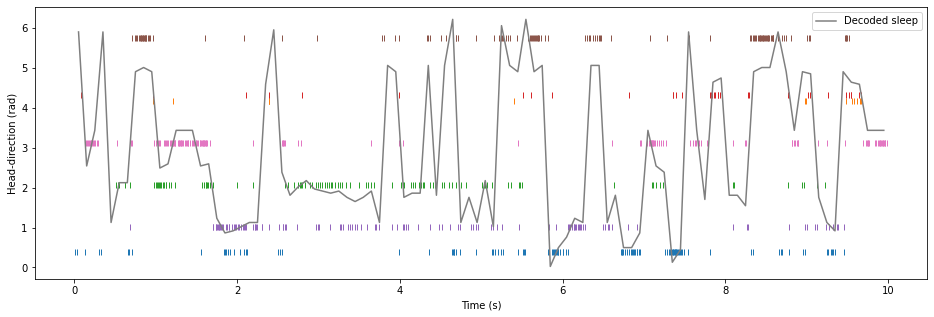

In [18]:
decoded_sleep, proba_angle_Sleep = nap.decode_1d(tuning_curves=tuning_curves_adn,
                                                 group=spikes_adn, 
                                                 ep=epochs['sleep'],
                                                 bin_size=0.1, # second
                                                 feature=position['ry'], 
                                                 )

# Finding quickly max direction of tuning curves
peaks_adn = tuning_curves_adn.idxmax()

# Defining a sub epoch during sleep
subep = nap.IntervalSet(start=0, end=10, time_units='s')

plt.figure(figsize=(16,5))
# create a raster plot
for n in spikes_adn.keys():
    plt.plot(spikes_adn[n].restrict(subep).as_units('s').fillna(peaks_adn[n]), '|')

plt.plot(decoded_sleep.restrict(subep).as_units('s'), label = 'Decoded sleep')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Head-direction (rad)")
plt.show()